The following notebook is a machine learning Binary Classification Model predicting Churn. 

This model uses a telecommunication dataset that trains on customer data to predict liklihood of customer retention.

Ideally, if a given record scores on churn probability higher than threshold set by us, the company is to act upon this record with promotions aimed at longer term retention.

In [3]:
#  import the necessary libraries all at once for workflow
#  url = https://github.com/alexeygrigorev/mlbookcamp-code/tree/master/course-zoomcamp/02-regression
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [4]:
df = pd.read_csv('telco-churn.csv')
print(f"The dataset contains {len(df)} rows:")
df

The dataset contains 7043 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
#  for dataframes where there is too many columns to show in head() or other viewing methods, 
#  transpose the dataframe

df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
# standardize string data by removing whitespace and changing case uniformly
df.columns = df.columns.str.lower().str.replace(' ', '_') 

string_columns = list(df.dtypes[df.dtypes == 'object'].index) 

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.5,no
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.9,no
7040,4801-jzazl,female,0,yes,yes,11,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,no
7041,8361-ltmkd,male,1,yes,no,4,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,74.40,306.6,yes


In [7]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [8]:
# inspecting dtypes
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

    totalcharges is a string type (object), it should be numerical type

In [9]:
# changing datatype appropriately
pd.to_numeric(df.totalcharges)

ValueError: Unable to parse string "_" at position 488

In [10]:
# changing datatype appropriately, 
# if errors=‘coerce’, then invalid parsing will be set as NaN
# If errors=‘raise’, then invalid parsing will raise an exception.
# If errors=‘ignore’, then invalid parsing will return the input.

tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [12]:
tc.isnull().value_counts()

False    7032
True       11
Name: totalcharges, dtype: int64

In [13]:
# viewing rows that have not been transformed, should return the True total above
df[tc.isnull()]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-lvygi,female,0,yes,yes,0,no,no_phone_service,dsl,yes,...,yes,yes,yes,no,two_year,yes,bank_transfer_(automatic),52.55,_,no
753,3115-czmzd,male,0,no,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.25,_,no
936,5709-lvoeq,female,0,yes,yes,0,yes,no,dsl,yes,...,yes,no,yes,yes,two_year,no,mailed_check,80.85,_,no
1082,4367-nuyao,male,0,yes,yes,0,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,25.75,_,no
1340,1371-dwpaz,female,0,yes,yes,0,no,no_phone_service,dsl,yes,...,yes,yes,yes,no,two_year,no,credit_card_(automatic),56.05,_,no
3331,7644-omvmy,male,0,yes,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.85,_,no
3826,3213-vvolg,male,0,yes,yes,0,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,25.35,_,no
4380,2520-sgtta,female,0,yes,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.00,_,no
5218,2923-arzlg,male,0,yes,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,yes,mailed_check,19.70,_,no
6670,4075-wkniu,female,0,yes,yes,0,yes,yes,dsl,no,...,yes,yes,yes,no,two_year,no,mailed_check,73.35,_,no


In [14]:
# inspect at a more granular level
# where tc is null, return two columns from df
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [15]:
# begin transformation of feature variable, by changing dtype to numeric, and errors are transformed to NaN value

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [16]:
# fill the NA values with 0
df.totalcharges = df.totalcharges.fillna(0)

In [17]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,0.0
753,3115-czmzd,0.0
936,5709-lvoeq,0.0
1082,4367-nuyao,0.0
1340,1371-dwpaz,0.0
3331,7644-omvmy,0.0
3826,3213-vvolg,0.0
4380,2520-sgtta,0.0
5218,2923-arzlg,0.0
6670,4075-wkniu,0.0


In [18]:
# inspect the target variable
df.churn.head()

# alternatively
# df.churn == 'yes'

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [19]:
# view as binary values
(df.churn == 'yes').astype(int).head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int32

In [20]:
# Transform the label for target in a binary classification use
df.churn = (df.churn == 'yes').astype(int)

In [21]:
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.50,0
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.90,0
7040,4801-jzazl,female,0,yes,yes,11,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,0
7041,8361-ltmkd,male,1,yes,no,4,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,74.40,306.60,1


### Setting up Validation Framework

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

train

In [24]:
# Break the full train dataset in an 80/20 split 
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [25]:
# df_full_train contains the 80% split, which is 60% train, 20% validation
# this full train will need to be split again shortly
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5192,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
3980,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
235,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [26]:
# df_test is 20% split and not to be split further
df_test

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3381,8879-zkjof,female,0,no,no,41,yes,no,dsl,yes,...,yes,yes,yes,yes,one_year,yes,bank_transfer_(automatic),79.85,3320.75,0
6180,0201-mibol,female,1,no,no,66,yes,yes,fiber_optic,yes,...,no,no,yes,yes,two_year,yes,bank_transfer_(automatic),102.40,6471.85,0
4829,1600-dilpe,female,0,no,no,12,yes,no,dsl,no,...,no,no,no,no,month-to-month,yes,bank_transfer_(automatic),45.00,524.35,0
3737,8601-qacrs,female,0,no,no,5,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,50.60,249.95,1
4249,7919-zodzz,female,0,yes,yes,10,yes,no,dsl,no,...,yes,no,no,yes,one_year,yes,mailed_check,65.90,660.05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,5130-iekqt,male,1,no,no,25,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,no,mailed_check,105.95,2655.25,1
2028,4452-rohmo,female,0,no,no,15,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.60,331.60,0
2899,6164-haqtx,male,0,no,no,71,no,no_phone_service,dsl,yes,...,yes,yes,yes,no,two_year,no,bank_transfer_(automatic),53.95,3888.65,0
3474,3982-dqlus,male,1,yes,yes,65,yes,yes,fiber_optic,yes,...,no,no,no,no,month-to-month,yes,electronic_check,85.75,5688.45,0


In [27]:
# split the full training split into train and validation dataframes
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [28]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [30]:
#  reset the indices for all three splits
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [31]:
#  create variables which contain the original values of the label, target

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [32]:
#  remove label from splits so that they cannot be used in model
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [33]:
#  calling the full training dataset to ensure that the deletion of target is on appropriate datasets
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5192,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
3980,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
235,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [34]:
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,yes,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15
1,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,yes,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55
2,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65
3,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,no,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10
4,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,yes,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55
4221,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,no,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80
4222,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,no,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),90.00,190.05
4223,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95


## Exploratory Data Analysis

In [35]:
# begin exploratory data analysis and identify opportunites
df_full_train = df_full_train.reset_index(drop=True)
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [36]:
# check for NaN
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [37]:
# inspect the target label
# 0 = not churn
# 1 = churn
df_full_train.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [38]:
print(len(df_full_train))

5634


In [39]:
4113 + 1521

5634

In [40]:
4113/5634

0.7300319488817891

In [41]:
1521/5634

0.26996805111821087

In [42]:
# Global churn rate for train + validation, possible because these are made in binary variables
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

Computing the mean of a binary variable that represents churn (i.e., whether a customer has churned or not) produces the churn rate because the mean represents the proportion of customers who have churned.

A binary variable can take on two possible values, usually represented as 0 or 1. In the case of churn, 0 would typically represent that the customer has not churned, while 1 would represent that the customer has churned.

    By computing the mean of the binary variable, we are essentially calculating the average value of the variable across all observations. Since churn is a binary variable that takes on values of 0 or 1, the mean of the variable represents the proportion of customers who have churned, which is also known as the churn rate. For example, if 100 customers were included in the dataset and 20 of them had churned, the mean of the binary variable would be 0.2, which represents the churn rate of 20%.

In [43]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

In [44]:
# begin to inspect the datatypes of columns so that we can later place them into two different feature cateogries, categorical or numerical features
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

In [45]:
# call a list so that we can reference/ copy+paste in following cells
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [46]:
numerical =['tenure', 'monthlycharges', 'totalcharges']

categorical = ['gender',
 'seniorcitizen', 
 'partner', 
 'dependents', 
 'phoneservice', 
 'multiplelines', 
 'internetservice',
 'onlinesecurity', 
 'onlinebackup', 
 'deviceprotection', 
 'techsupport',
 'streamingtv', 
 'streamingmovies', 
 'contract', 
 'paperlessbilling',
 'paymentmethod'
 ]

In [47]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [48]:
# inspect the unique values per column
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

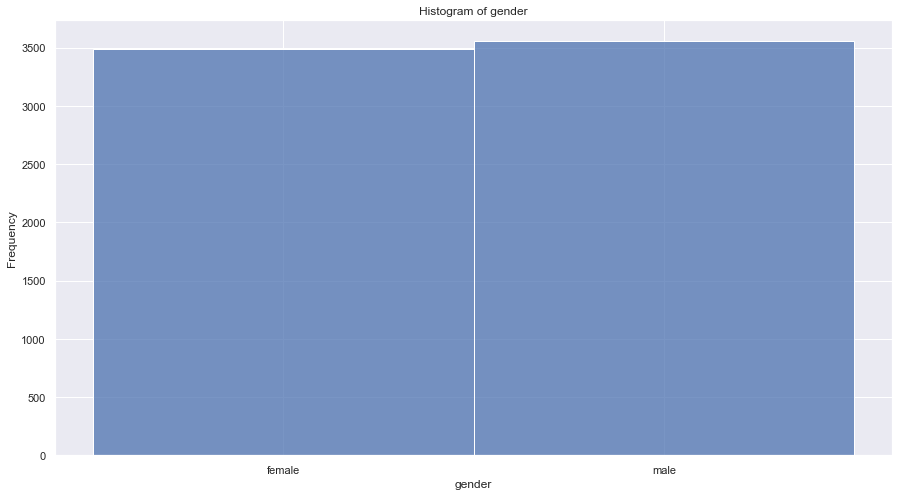

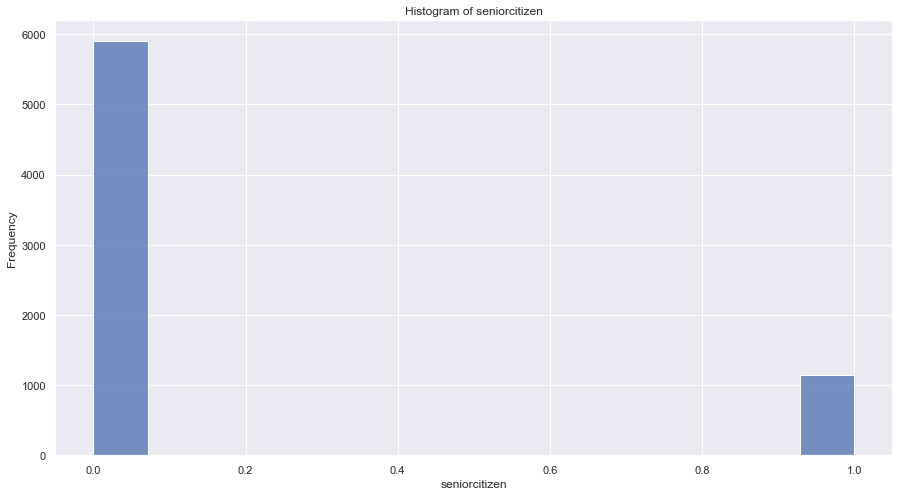

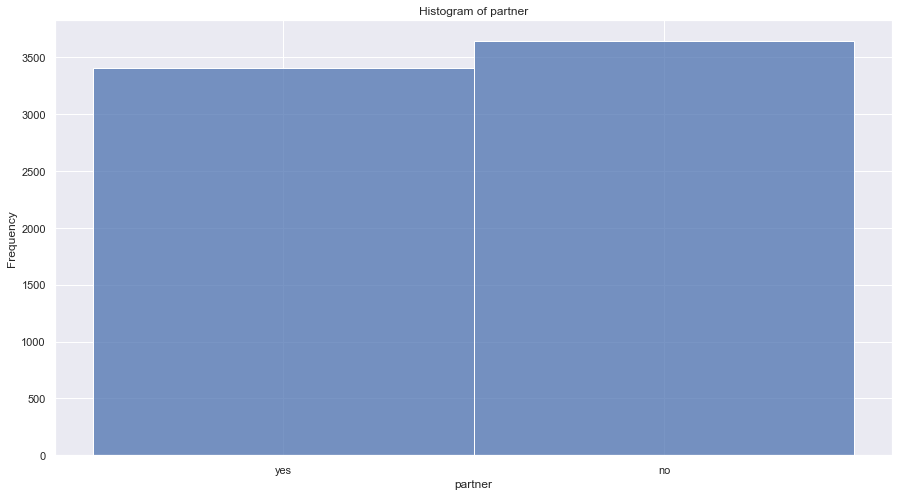

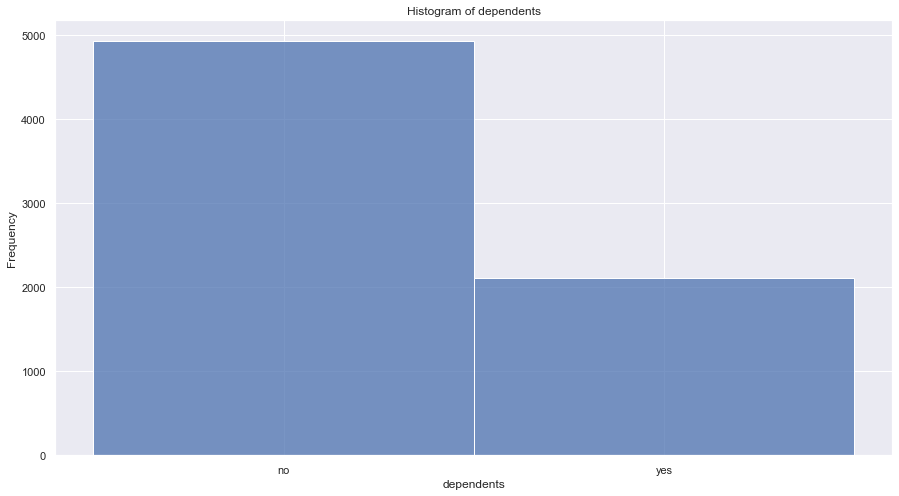

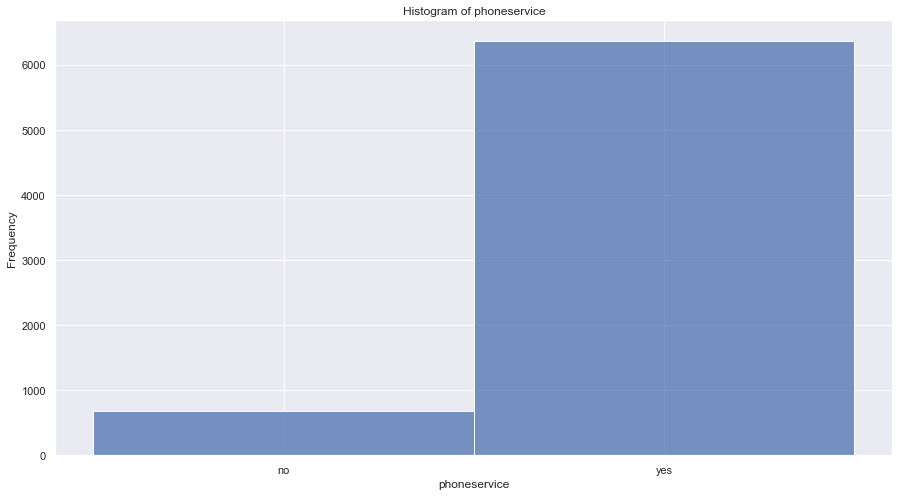

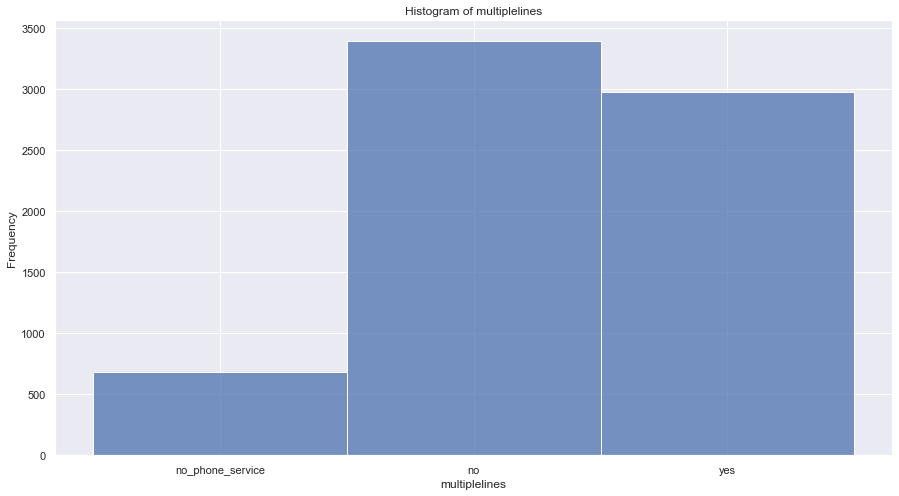

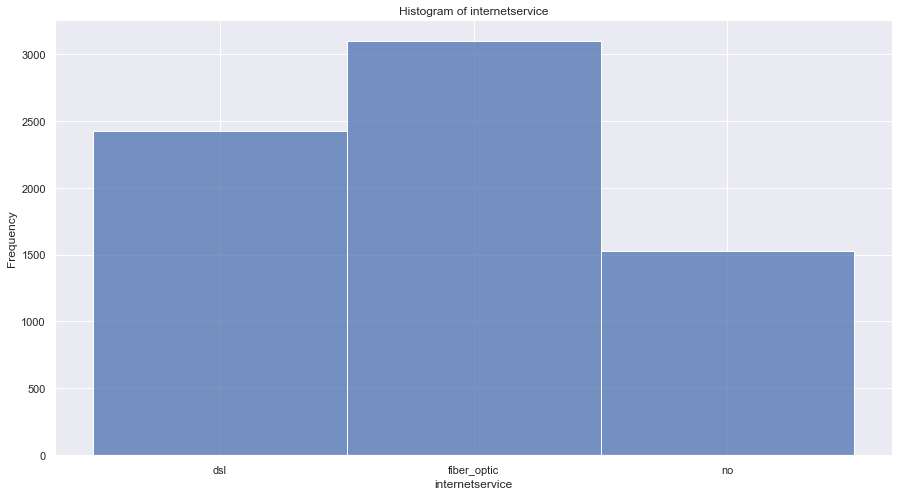

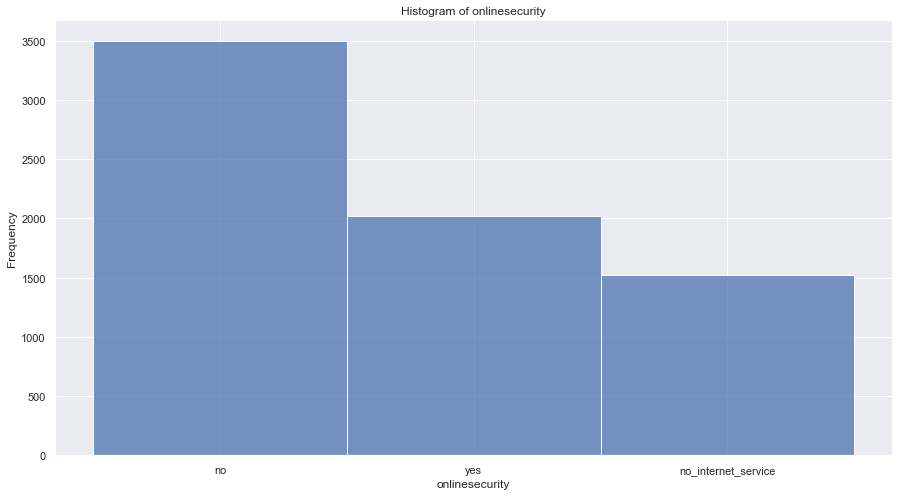

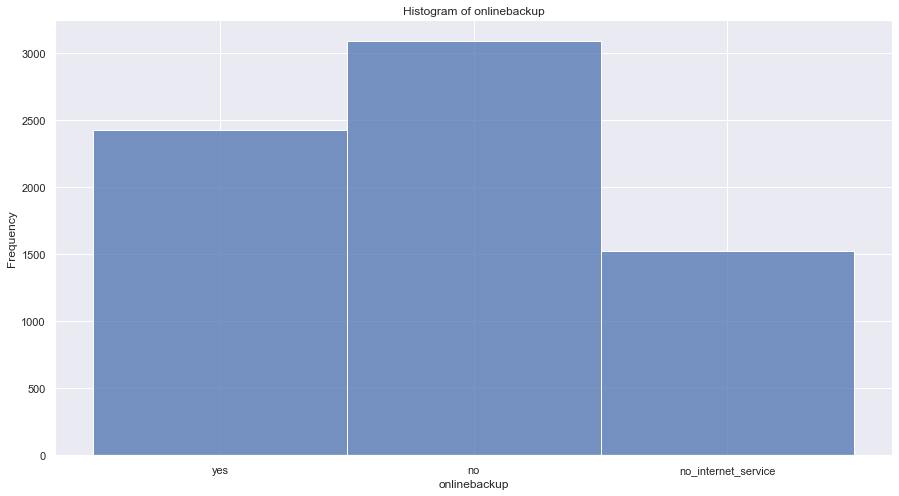

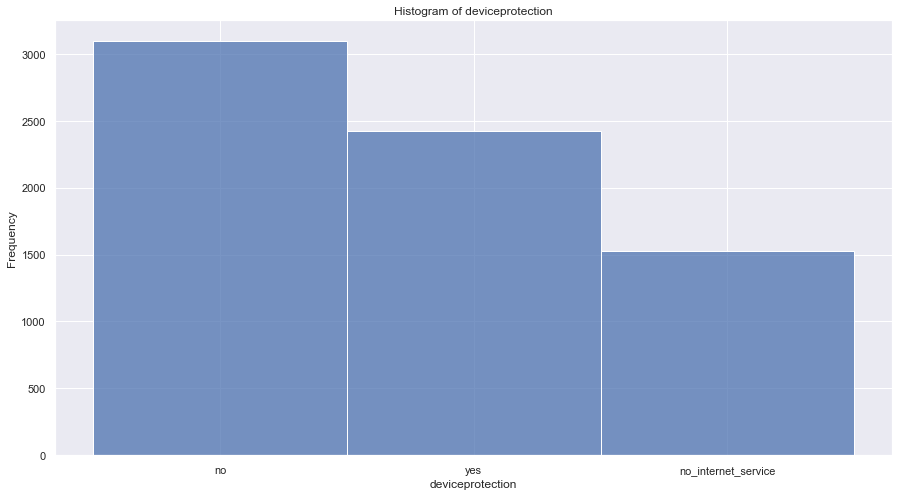

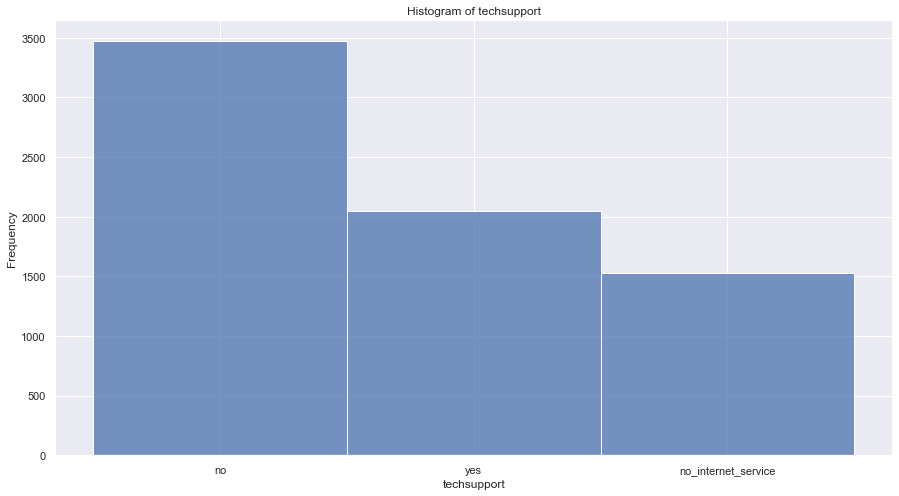

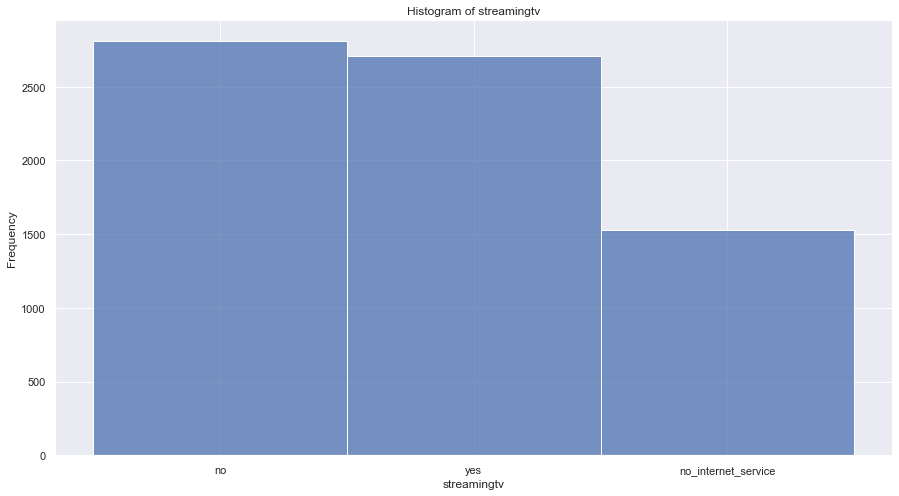

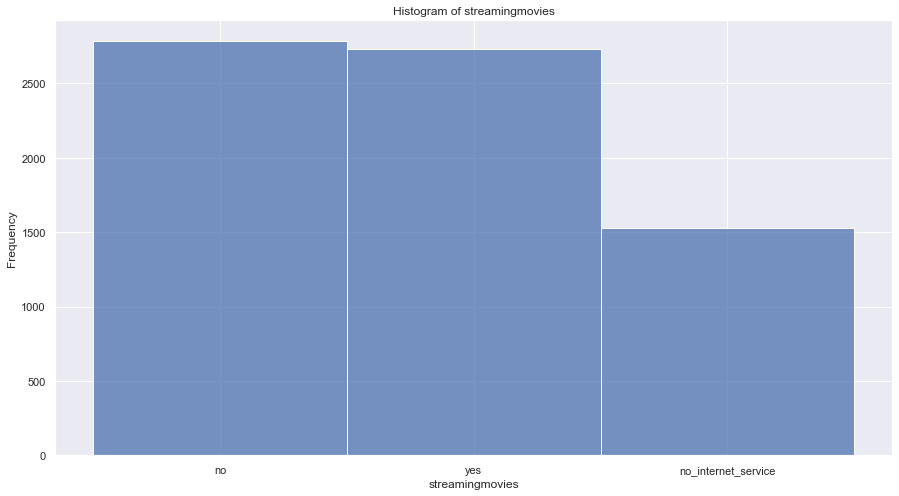

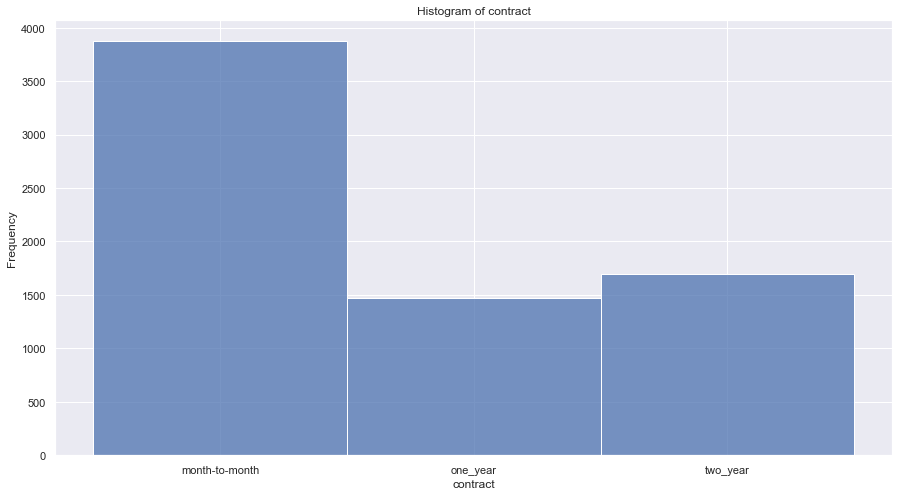

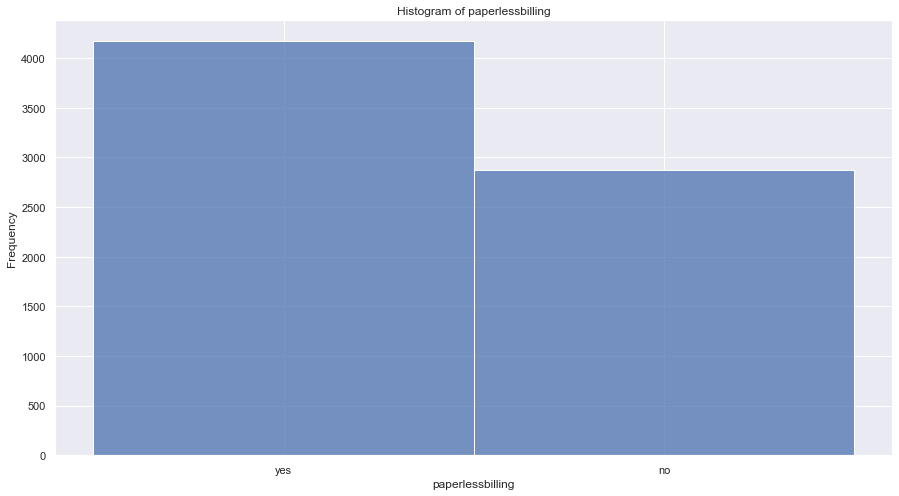

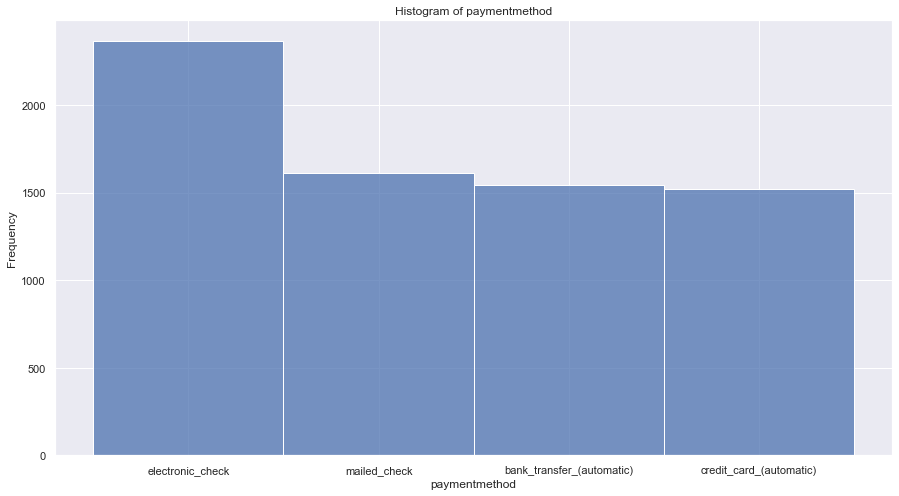

In [53]:
""" This for loop will iterate over each column in the DataFrame
    and create a histogram for that column using Seaborn's histplot() function. 
    The histogram will be displayed using the show() function, 
    and a new plot will be created for each iteration of the loop.
"""
import seaborn as sns
sns.set_style("darkgrid")
sns.set(rc = {'figure.figsize':(15,8)})
# Iterate over each column in the DataFrame
for column in df[categorical]:
    # Create a histogram for the column
    sns.histplot(df[column])
    # Add a title and axis labels
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    # Display the plot
    plt.show()


## Feature Importance: Churn Rate And Risk Ratio

Feature importance is a measure of the relative importance ofeach feature (i.e., predictor variable) in predicting the target variable (i.e., binary outcome). Feature importance is often used to identify the most informative features and to help guide feature selection and model building.

In [54]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


    The following examines further subsets of training dataframe by condition to target variable, we are exploring patterns by gender

In [55]:
#  select a given subset
df_full_train[df_full_train.gender == 'female']

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
5,4765-oxppd,female,0,yes,yes,9,yes,no,dsl,yes,...,yes,yes,no,no,month-to-month,no,mailed_check,65.00,663.05,1
9,1732-vhubq,female,1,yes,yes,47,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,no,bank_transfer_(automatic),70.55,3309.25,1
11,7017-vfuly,female,0,yes,no,2,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,bank_transfer_(automatic),20.10,43.15,0
13,1374-dmzui,female,1,no,no,4,yes,yes,fiber_optic,no,...,no,no,yes,yes,month-to-month,yes,electronic_check,94.30,424.45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5618,8065-ykxkd,female,0,no,no,10,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,74.75,799.65,1
5619,5627-tvbpp,female,0,no,yes,35,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,yes,credit_card_(automatic),20.10,644.50,0
5626,3262-eidhv,female,0,yes,yes,72,yes,yes,dsl,yes,...,yes,yes,yes,yes,two_year,no,credit_card_(automatic),84.70,5893.90,0
5627,7446-sfaoa,female,0,yes,no,37,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,yes,bank_transfer_(automatic),19.85,717.50,0


In [56]:
df_full_train[df_full_train.gender == 'female'].churn.mean()

0.27682403433476394

In [57]:
print(f"Female Churn Rate: {round(df_full_train[df_full_train.gender == 'female'].churn.mean(), 2)}")
print(f"Male Churn Rate: {round(df_full_train[df_full_train.gender == 'male'].churn.mean(), 2)}")
print(f"Global Churn Rate: {round(global_churn_rate, 2)}")

Female Churn Rate: 0.28
Male Churn Rate: 0.26
Global Churn Rate: 0.27


    Not a huge variance between male/female. 

In [58]:
# Now examining for a different categorical variable, partners
df_full_train[df_full_train.partner == 'yes'].churn.mean()

0.20503330866025166

In [59]:
print(f"Has Partner Churn Rate: {round(df_full_train[df_full_train.partner == 'yes'].churn.mean(), 2)}")
print(f"No Partner Churn Rate: {round(df_full_train[df_full_train.partner == 'no'].churn.mean(), 2)}")
print(f"Global Churn Rate: {round(global_churn_rate, 2)}")

Has Partner Churn Rate: 0.21
No Partner Churn Rate: 0.33
Global Churn Rate: 0.27


In assessing feature importance, we can use either Difference or Risk Ratio

## Difference describes in absolute terms

    Difference = Global - Group
    
    if difference > 0:
        Global Churn is higher, and group is less likely to churn

    if difference < 0:
        returns negative number, signifies the group is MORE likely to churn

In [60]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()

In [72]:
print(f"Female Churn Difference: {round(global_churn_rate - churn_female, 5)}")
print(f"Male Churn Difference: {round(global_churn_rate - churn_male, 5)}")
print("")
print(f"No Partner Churn Difference: {round(global_churn_rate - churn_no_partner, 5)}")
print(f"Has Partner Churn Difference: {round(global_churn_rate - churn_partner, 5)}")

Female Churn Difference: -0.00686
Male Churn Difference: 0.00675

No Partner Churn Difference: -0.05984
Has Partner Churn Difference: 0.06493


Through using Difference as a measure to evaluate churn predictive variables, we find that the Sex of a customer has minimal affect on Churn predictability, whereas their Relationship status has a greater affect.

Those with no partner are roughly 6% more likely to churn.

# Risk Ratio describes in relative terms

    Risk = Group / Global Churn

        if greater than 1:
        more likely to churn
        
        if less than 1:
        less likely to churn

In [ ]:
# reference only:
# churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
# churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()

In [73]:
churn_no_partner / global_churn_rate

# with no partner, churn rate is 22% higher

1.2216593879412643

In [74]:
churn_partner / global_churn_rate

# with partner, churn rate is 24.1% lower

0.7594724924338315

In [75]:
df_full_train.groupby('gender').churn.mean()

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

In [76]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group

,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


In [77]:
df_group['diff'] = global_churn_rate -df_group['mean']
df_group['risk'] = df_group['mean'] / global_churn_rate
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,-0.006856,1.025396
male,0.263214,2838,0.006755,0.974980


In [78]:
#  scale up for loop
from IPython.display import display

for c in categorical:
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['difference'] =  global_churn_rate - df_group['mean']
    df_group['risk_ratio'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()


,mean,count,difference,risk_ratio
gender,,,,
female,0.276824,2796,-0.006856,1.025396
male,0.263214,2838,0.006755,0.974980


,mean,count,difference,risk_ratio
seniorcitizen,,,,
0,0.242270,4722,0.027698,0.897403
1,0.413377,912,-0.143409,1.531208


,mean,count,difference,risk_ratio
partner,,,,
no,0.329809,2932,-0.059841,1.221659
yes,0.205033,2702,0.064935,0.759472


,mean,count,difference,risk_ratio
dependents,,,,
no,0.313760,3968,-0.043792,1.162212
yes,0.165666,1666,0.104302,0.613651


,mean,count,difference,risk_ratio
phoneservice,,,,
no,0.241316,547,0.028652,0.893870
yes,0.273049,5087,-0.003081,1.011412


,mean,count,difference,risk_ratio
multiplelines,,,,
no,0.257407,2700,0.012561,0.953474
no_phone_service,0.241316,547,0.028652,0.893870
yes,0.290742,2387,-0.020773,1.076948


,mean,count,difference,risk_ratio
internetservice,,,,
dsl,0.192347,1934,0.077621,0.712482
fiber_optic,0.425171,2479,-0.155203,1.574895
no,0.077805,1221,0.192163,0.288201


,mean,count,difference,risk_ratio
onlinesecurity,,,,
no,0.420921,2801,-0.150953,1.559152
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.153226,1612,0.116742,0.567570


,mean,count,difference,risk_ratio
onlinebackup,,,,
no,0.404323,2498,-0.134355,1.497672
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.217232,1915,0.052736,0.804660


,mean,count,difference,risk_ratio
deviceprotection,,,,
no,0.395875,2473,-0.125907,1.466379
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.230412,1940,0.039556,0.853480


,mean,count,difference,risk_ratio
techsupport,,,,
no,0.418914,2781,-0.148946,1.551717
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.159926,1632,0.110042,0.592390


,mean,count,difference,risk_ratio
streamingtv,,,,
no,0.342832,2246,-0.072864,1.269897
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.302723,2167,-0.032755,1.121328


,mean,count,difference,risk_ratio
streamingmovies,,,,
no,0.338906,2213,-0.068938,1.255358
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.307273,2200,-0.037305,1.138182


,mean,count,difference,risk_ratio
contract,,,,
month-to-month,0.431701,3104,-0.161733,1.599082
one_year,0.120573,1186,0.149395,0.446621
two_year,0.028274,1344,0.241694,0.104730


,mean,count,difference,risk_ratio
paperlessbilling,,,,
no,0.172071,2313,0.097897,0.637375
yes,0.338151,3321,-0.068183,1.252560


,mean,count,difference,risk_ratio
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,0.101797,0.622928
credit_card_(automatic),0.164339,1217,0.105630,0.608733
electronic_check,0.455890,1893,-0.185922,1.688682
mailed_check,0.193870,1305,0.076098,0.718121


# Feature Importance: Mutual Information

Mutual information is a statistical measure that quantifies the amount of information that one variable provides about another variable. In binary classification models, mutual information can be used to assess the relationship between each feature (i.e., predictor variable) and the target variable (i.e., binary outcome).

In simpler terms, mutual information tells us how much information a particular feature provides about whether the target variable is positive or negative. This is useful for categorical variables where another measure, such as correlation, is not applicable.

In binary classification models, mutual information can be used to identify the most informative features and to guide feature selection and model building. Features with higher mutual information values are considered to be more important, as they provide more information about the target variable and are more likely to be predictive of the outcome.

It's important to note that mutual information is not without limitations, and it can be affected by factors such as sample size, feature distributions, and the choice of model. Therefore, it's often recommended to use mutual information in combination with other feature selection and model building techniques to improve the robustness and generalizability of the model.

In [79]:
from sklearn.metrics import mutual_info_score

# https://en.wikipedia.org/wiki/Mutual_information

# In probability theory and information theory, 
# the mutual information (MI) of two random variables is a measure of 
# the mutual dependence between the two variables. 
# 
# More specifically, it quantifies the "amount of information" (in units such as shannons (bits), nats or hartleys)
# obtained about one random variable by observing the other random variable. 

In [80]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [81]:
#  order does not matter
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [82]:
# now comparing back to gender from previous examples
# very low score about churn from gender
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [83]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [84]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## Feature Importance: Correlation

Pearson coefficient, also known as Pearson correlation coefficient, is a statistical measure that quantifies the strength and direction of the linear relationship between two variables. In binary classification models, Pearson coefficient can be used to assess the correlation between each feature (i.e., predictor variable) and the target variable (i.e., binary outcome).

    More specifically, Pearson coefficient measures the degree to which the two variables move together or apart. It ranges from -1 to +1, where a value of -1 indicates a perfect negative linear relationship, a value of 0 indicates no linear relationship, and a value of +1 indicates a perfect positive linear relationship.

In binary classification models, Pearson coefficient can be helpful in identifying features that are highly correlated with the target variable, as these features may be more informative and more likely to be predictive of the outcome. For example, if a feature has a high positive correlation with the target variable, it means that as the feature value increases, the likelihood of the positive outcome also increases.

However, it's important to note that Pearson coefficient only captures linear relationships between variables, and may not capture non-linear or complex relationships. Additionally, high correlation between features (i.e., multicollinearity) can lead to instability and overfitting in the model. Therefore, it's often recommended to use Pearson coefficient in combination with other feature selection and model building techniques to improve the robustness and generalizability of the model.

    Generally speaking:

        0 to 0.2, weak correlation

        0.3 to 0.5, moderate correlation
    
        0.6 to 1, strong correlation

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [85]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

when tenure increases, churn decreases

when monthlycharges increases, churn increases

when totalcharges increases, churn decreases


In [117]:
data_numeric = df[['tenure', 'monthlycharges', 'totalcharges', 'churn']]
data_numeric

,tenure,monthlycharges,totalcharges,churn
0,1,29.85,29.85,0
1,34,56.95,1889.50,0
2,2,53.85,108.15,1
3,45,42.30,1840.75,0
4,2,70.70,151.65,1
...,...,...,...,...
7038,24,84.80,1990.50,0
7039,72,103.20,7362.90,0
7040,11,29.60,346.45,0
7041,4,74.40,306.60,1


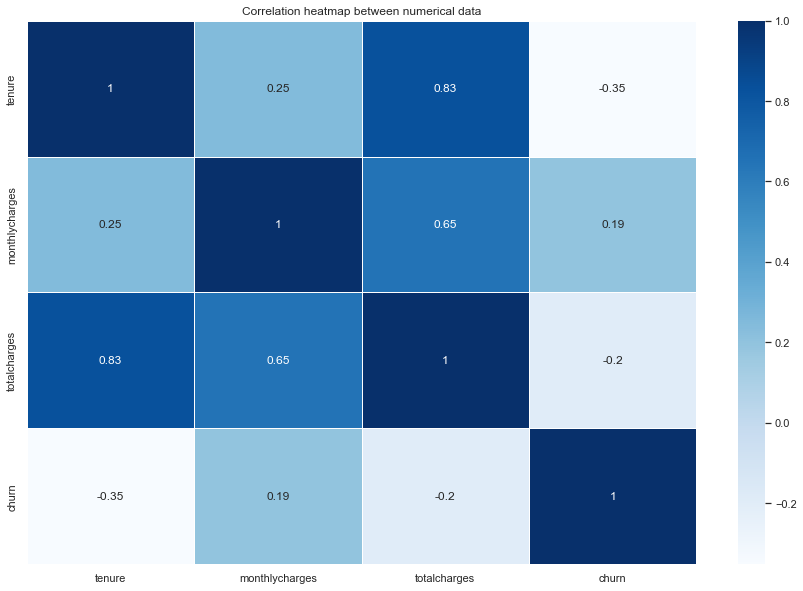

In [123]:
# create a heatmap visualizing correlation between the above data presented
plt.figure(figsize=(15,10))  
sns.heatmap(data_numeric.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Correlation heatmap between numerical data')
plt.show()

In [88]:
#  investigate the tenure to churn correlation, when tenure is less than or equal to 2 months

df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [89]:
# between 2 and 12 months
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

In [90]:
#  churn rate for beyond 12 months
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

In [100]:
month_number = [1,2,3,4,5,6,7,8,9,10,11,12]

for i in month_number:
    # loop through values and calculate churn rate for each length of tenure
    print(f"{i}-month tenure length: {df_full_train[df_full_train.tenure == i].churn.mean().round(3)}")

1-month tenure length: 0.635
2-month tenure length: 0.521
3-month tenure length: 0.448
4-month tenure length: 0.493
5-month tenure length: 0.472
6-month tenure length: 0.34
7-month tenure length: 0.372
8-month tenure length: 0.374
9-month tenure length: 0.402
10-month tenure length: 0.366
11-month tenure length: 0.289
12-month tenure length: 0.33


    When viewing tenure in a one year timespan, it appears that Churn is more likely to occur within the first 6 months of subscription service.

In [101]:
# now for monthly charges
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [102]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

0.18340943683409436

In [105]:
df_full_train[df_full_train.monthlycharges > 75].churn.mean()

0.3531761885737115

    When total charges for the subscription increase, chrun is likely to follow. Often, this is because brands are trying to get new customers via competitive pricing methods.

# Data Transformation: One-Hot Encoding 

One-hot encoding is a technique used in model building to convert categorical variables into numerical variables that can be used as inputs to machine learning models.

It is a way of representing categorical data in a binary format. It works by creating a new binary column for each category in the categorical variable.

    For example, if we have a categorical variable "color" with categories "red", "green", and "blue", one-hot encoding would create three new columns named "color_red", "color_green", and "color_blue". Each row in the dataset would then have a value of 1 in the corresponding column for its color category, and 0 in all other columns.

This technique is helpful because many machine learning algorithms can only work with numerical data. By converting categorical data into a binary format, we can use it as input to machine learning algorithms. Additionally, one-hot encoding can prevent models from assigning any ordinal or other numerical meaning to the categorical variables, which can improve the accuracy of the model.

In [124]:
from sklearn.feature_extraction import DictVectorizer

# DictVectorizer is a tool from the Scikit-learn library,
# it is used to convert dictionaries into numerical arrays that can be used for machine learning tasks.

# A dictionary is a data structure that stores data in key-value pairs. 
# Each key in the dictionary is associated with a value. 
# For example, in a dictionary that stores information about people, 
# each key might be the person's name, and the value might be their age, occupation, or other attributes.

# In machine learning, we often need to convert our data into a numerical format
# that can be used to train a model. 
# 
# DictVectorizer helps us to do this by converting each key-value pair in a dictionary into a numerical value. 
# It creates a new column for each unique key in the dictionary, 
# and the value in each row of the column is the value associated with that key for that particular row

In [125]:
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,yes,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15
1,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,yes,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55
2,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65
3,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,no,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10
4,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,yes,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55
4221,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,no,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80
4222,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,no,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),90.00,190.05
4223,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95


In [129]:
# DictVectorizer can take columns of numerical datatypes and does not apply the vectorization to the variable
# see 'tenure' for example thoughout process
df_train[['gender', 'contract', 'tenure']].iloc[100].to_dict()

{'gender': 'male', 'contract': 'two_year', 'tenure': 72}

In [130]:
# orient='records' enables each row to become it's own dictionary
df_train[['gender', 'contract', 'tenure']].iloc[:10].to_dict(orient='records')

[{'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 10},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 5},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 5},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 18},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 4},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 1},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 1},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 6}]

In [131]:
dicts = df_train[['gender', 'contract', 'tenure']].to_dict(orient='records')

In [132]:
# DictVectorizer can take columns of numerical datatypes and does not apply the vectorization to the variable
dv = DictVectorizer(sparse=False)

In [133]:
# Fit the dictionaries just now created and fit to the Class type
dv.fit(dicts)

DictVectorizer(sparse=False)

In [134]:
# transform by one-hot encoding
dv.transform(dicts)

array([[ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 10.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       ...,
       [ 1.,  0.,  0.,  0.,  1.,  2.],
       [ 0.,  0.,  1.,  1.,  0., 27.],
       [ 1.,  0.,  0.,  1.,  0.,  9.]])

In [138]:
# get_feature_names() grabs the columns:value pairs of the one-hot encode
list(dv.get_feature_names())

C:\Users\steve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male',
 'tenure']

In [139]:
#  now we scale up to entire Training set of data
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [140]:
# taking a look at an example within dictionary 
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [141]:
# inititate the object
dv = DictVectorizer(sparse=False)

In [142]:
# fit dictionaries to object
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [143]:
# transform via one-hot encoding
dv.transform(train_dicts)

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]])

In [144]:
list(dv.get_feature_names())

C:\Users\steve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [145]:
# train_dicts contains the entire training dataset
X_train = dv.fit_transform(train_dicts)

# is identical to:
# dv.fit(train_dicts)
# X_train = dv.transform(train_dicts)

In [146]:
X_train.shape

(4225, 45)

In [147]:
#  proof of identical syntax to above cells
dv.fit(train_dicts)
X_train = dv.transform(train_dicts)

In [148]:
X_train.shape

(4225, 45)

In [149]:
y_train.shape

(4225,)

Now performing the transformation on Validation dataset, we do not fit validation to DictVectorizer object as it is already fitted with Training

In [150]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [151]:
X_val = dv.transform(val_dicts)

In [152]:
X_val.shape

(1409, 45)

# Logistic Regression: Sigmoid Function

In logistic regression, the sigmoid function is a mathematical function that maps the output of the model to a probability value between 0 and 1.

In simpler terms, the sigmoid function takes the output of the logistic regression model, which is a weighted sum of the input variables, and squashes it into a probability value between 0 and 1.

    Think of it like a funnel that takes in a range of values and outputs a value between 0 and 1. The sigmoid function is an S-shaped curve that starts at 0 on the left-hand side and ends at 1 on the right-hand side.

The output of the sigmoid function can be interpreted as the probability of a binary outcome, such as whether or not a student will pass a test or whether or not a customer will make a purchase. If the output of the model is close to 1, it means that the probability of the event happening is high, while if it's close to 0, it means that the probability is low.

The sigmoid function is important in logistic regression because it allows us to make predictions about binary outcomes based on input variables. By mapping the output of the model to a probability value between 0 and 1, we can make more nuanced predictions about the likelihood of an event occurring based on the input variables.

In [153]:
""" This code defines a function called sigmoid that takes in a numerical input value z,
    and returns the output of the sigmoid function for that input value.

    The sigmoid function is a mathematical function that maps its input value to a probability value between 0 and 1. 
    In this code, the sigmoid function is defined using the equation 1 / (1 + np.exp(-z)).
"""
def sigmoid(z):
    # The np.exp(-z) part of the equation calculates the exponential of the negative of z. 
    # The negative sign is included because the sigmoid function is an S-shaped curve,
    # that starts at 0 for very negative values of z.
    return 1 / (1 + np.exp(-z))
    # The 1 / (1 + np.exp(-z)) part of the equation applies the sigmoid function
    # to the input z by dividing 1 by the sum of 1 and the exponential of the negative of z. 
    # 
    # This results in a value between 0 and 1 that represents the probability of a binary outcome.

In [154]:
#  linspace() argments are: starting number, ending number, and steps
z = np.linspace(-5, 5, 51)
z

array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
       -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
       -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
        1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
        3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ])

In [155]:
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

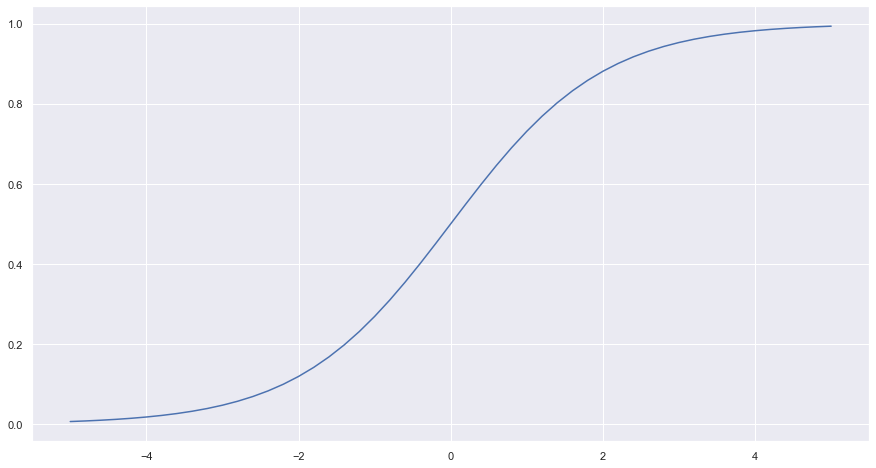

In [156]:
plt.plot(z, sigmoid(z))

In [157]:
# def linear_regression(xi):
#     result = w0

#     for j in range(len(w)):
#         result = result + xi[j] * w[j]

#     return result

def logistic_regression(xi):
    score = w0

    for j in range(len(w)):
        score = score + xi[j] * w[j]

    result = sigmoid(score)
    return result

    Both Linear & Logistic Regression are considered linear models as the dot product is a linear operator in algebra

# Training Logistic Regression with sklearn

In [158]:
from sklearn.linear_model import LogisticRegression

In [159]:
# Create an instance of the LogisticRegression class
model = LogisticRegression()
# Train the logistic regression model on the training data
# X_train is the feature matrix for the training data, and y_train is the target vector
model.fit(X_train, y_train)

LogisticRegression()

In [160]:
# bias charm/term
model.intercept_[0]

-0.10903527212158218

In [161]:
# weights, model.coef_ is an attribute of the LogisticRegression class that returns an array of shape (1, n_features)
# that contains the coefficients of the logistic regression model.
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

'predict()' returns the predicted class labels (0 or 1) of the samples in the input data. This method does not return the probability estimates, but only the binary predictions.

In [162]:
#  hard predictions
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

predict_proba() is commonly used to obtain the predicted probabilities of the positive class, which can be compared to a threshold to make binary predictions. For example, if the threshold is set to 0.5, a sample with a predicted probability of the positive class greater than 0.5 is classified as positive, otherwise it is classified as negative.

In [164]:
# The first column of the array contains the probability of the sample belonging to the negative class, 
# and the second column contains the probability of the sample belonging to the positive class. 

# The two probabilities always sum to 1.
# In this use case, thesere is 90% probability of being negative class for first row, 
# and about 68% probability of positive class for second observation.
model.predict_proba(X_train)

array([[0.90451909, 0.09548091],
       [0.32067099, 0.67932901],
       [0.36632116, 0.63367884],
       ...,
       [0.46838547, 0.53161453],
       [0.95745833, 0.04254167],
       [0.30127114, 0.69872886]])

In [165]:
#  code for only selecting the churn probability of positive class
model.predict_proba(X_train)[:, 1]

array([0.09548091, 0.67932901, 0.63367884, ..., 0.53161453, 0.04254167,
       0.69872886])

In [166]:
#  now create the probability of the Validation data as the model is already fitted to Training data
y_pred = model.predict_proba(X_val)[:, 1]

In [168]:
y_pred

array([0.00899653, 0.20451825, 0.21221833, ..., 0.13638751, 0.79976879,
       0.83740613])

In [169]:
# we, the users, decide that the threshold to classify as churn is probability of (.50) and greater  
churn_decision = (y_pred >= 0.5)
churn_decision

array([False, False, False, ..., False,  True,  True])

In [170]:
# select all customers we believe are most at risk to churn
df_val[churn_decision]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
3,8433-wxgna,male,0,no,no,2,yes,no,fiber_optic,yes,no,no,no,no,no,month-to-month,yes,electronic_check,75.70,189.20
8,3440-jpscl,female,0,no,no,6,yes,no,fiber_optic,no,no,yes,yes,yes,yes,month-to-month,yes,mailed_check,99.95,547.65
11,2637-fkfsy,female,0,yes,no,3,yes,no,dsl,no,no,no,no,no,no,month-to-month,yes,mailed_check,46.10,130.15
12,7228-omtpn,male,0,no,no,4,yes,no,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,88.45,370.65
19,6711-fldfb,female,0,no,no,7,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,74.90,541.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,5976-jcjrh,male,0,yes,no,10,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.30,738.20
1398,2034-cgrhz,male,1,no,no,24,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,credit_card_(automatic),102.95,2496.70
1399,5276-kqwhg,female,1,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,69.60,131.65
1407,6521-yytyi,male,0,no,yes,1,yes,yes,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,93.30,93.30


In [135]:
# obtain the IDs of each customer, this can later be merged with biographical data via pd.merge from another SQL query
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

## Accuracy

In [174]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [175]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [176]:
(y_val == churn_decision).mean()

0.8034066713981547

(y_val == churn_decision) returns a boolean array that indicates whether each element in y_val is equal to the corresponding element in churn_decision. This is a comparison between the true class labels (y_val) and the predicted class labels (churn_decision).

When two arrays are compared using the == operator, the output is a boolean array of the same shape as the input arrays, where True indicates that the corresponding elements in the input arrays are equal, and False indicates that they are not equal.

    (y_val == churn_decision).mean() takes the mean of the boolean array to calculate the accuracy of the model on the validation set. Since the boolean array contains True for correct predictions and False for incorrect predictions, the mean of the boolean array gives the fraction of correct predictions. This is equivalent to calculating the number of correct predictions and dividing it by the total number of predictions.

Therefore, (y_val == churn_decision).mean() calculates the accuracy of the model on the validation set, which is the fraction of correct predictions.

In [178]:
# accuracy examined
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred

,probability,prediction,actual
0,0.008997,0,0
1,0.204518,0,0
2,0.212218,0,0
3,0.543047,1,1
4,0.213781,0,0
...,...,...,...
1404,0.313666,0,0
1405,0.039358,0,1
1406,0.136388,0,0
1407,0.799769,1,1


In [179]:
df_pred['correct'] = (df_pred.prediction == df_pred.actual)

In [180]:
df_pred

,probability,prediction,actual,correct
0,0.008997,0,0,True
1,0.204518,0,0,True
2,0.212218,0,0,True
3,0.543047,1,1,True
4,0.213781,0,0,True
...,...,...,...,...
1404,0.313666,0,0,True
1405,0.039358,0,1,False
1406,0.136388,0,0,True
1407,0.799769,1,1,True


In [182]:
df_pred.correct.mean(), (y_val == churn_decision).mean()

(0.8034066713981547, 0.8034066713981547)

# Model Interpretation - How and Why it works

In [183]:
# this code is the precursor to understanding how to pair the feature names to the weighted value assigned to each in our Linear Model

a = [1, 2, 3, 4]
b = 'abcd'

# Zip the two sequences a and b together to create a list of tuples
# Each tuple contains an element from a and the corresponding element from b
zipped_list = list(zip(a, b))

# Create a dictionary where the elements of a are the keys and 
# the corresponding elements of b are the values
zipped_dict = dict(zip(a, b))
zipped_dict

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [184]:
# getting the dictionary 'keys', feature names
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [185]:
# getting the dictionary 'values', weight coeffecients
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [186]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

    In interpreting the equation which creates a score which is then passed through the Sigmoid function, we will train a smaller model using a subset of data

In [187]:
# train a smaller model
small = ['contract', 'tenure', 'monthlycharges']
df_train[small]

,contract,tenure,monthlycharges
0,two_year,72,115.50
1,month-to-month,10,95.25
2,month-to-month,5,75.55
3,month-to-month,5,80.85
4,two_year,18,20.10
...,...,...,...
4220,one_year,52,80.85
4221,month-to-month,18,25.15
4222,month-to-month,2,90.00
4223,two_year,27,24.50


In [188]:
# initiate the dictionary which holds each observation, 10 records
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [189]:
# initiate the full dictionaries which holds each observation for the Training and Validation set of data

dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [190]:
# Create a DictVectorizer object with sparse=False to get a dense feature matrix
# DictVectorizer() is a class in scikit-learn that converts dictionaries of feature-value mappings
# into a feature matrix that can be used as input to a machine learning model
dv_small = DictVectorizer(sparse=False)
# Fit the DictVectorizer to the training data dicts_train_small
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [191]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [192]:
# Transform the training data, dicts_train_small, into a feature matrix X_train_small
X_train_small = dv_small.transform(dicts_train_small)
X_train_small

array([[  0.  ,   0.  ,   1.  , 115.5 ,  72.  ],
       [  1.  ,   0.  ,   0.  ,  95.25,  10.  ],
       [  1.  ,   0.  ,   0.  ,  75.55,   5.  ],
       ...,
       [  1.  ,   0.  ,   0.  ,  90.  ,   2.  ],
       [  0.  ,   0.  ,   1.  ,  24.5 ,  27.  ],
       [  1.  ,   0.  ,   0.  ,  80.85,   9.  ]])

In [193]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [194]:
# bias charm/term
w0 = model_small.intercept_[0]
w0

-2.476775662159248

In [195]:
# weights
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [196]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

    NOTE: for weights with negative value, this indicates that the feature tends to churn less. i.e. those with two-year contracts are likely to churn less, likely due to contractural agreements/penalties/etc.
    

In [197]:
# using the model with a fictional customer

# Customer: Steven Orizaga
# Contract: Month-to-Month
# Monthly Charges: $50
# Tenure: 5 months

# bias charm (w0) = -2.47

sigmoid( -2.47 + (1 * 0.97) + (0 * (-0.025)) + (0 * (-0.949)) + (50 * 0.027) + (5 * (-0.036)) )

0.41824062315816374

In [198]:
real_score = -2.47 + (1 * 0.97) + (0 * (-0.025)) + (0 * (-0.949)) + (50 * 0.027) + (5 * (-0.036))

In [199]:
# parameter _ takes output as the value
# sigmoid(_)

sigmoid(real_score)

0.41824062315816374

In [201]:
#  now we change values for a second customer
#  Monthly Charges = 60
#  Tenure = 1 Month
customer_2 = -2.47 + (0.97 * 1) + + (0 * (-0.025)) + (0 * (-0.949)) + (60 * 0.027) + (1 * (-0.036))
customer_2

0.08399999999999966

In [202]:
sigmoid(customer_2)

# customer 2 is churning, above threshold of .50

0.5209876607065322

In [203]:
#  now we change values for a third customer
#  Contract = Two-Year Contract
#  Monthly Charges = 30
#  Tenure = 24 Months

customer_3 = -2.47 + (0.97 * 0) + + (0 * (-0.025)) + ((-0.949) * 1) + (30 * 0.027) + (24 * (-0.036))
customer_3

-3.473

In [204]:
sigmoid(customer_3)

# customer is not at risk to churn

0.030090303318277657

    In one-hot encoding, values that are 'not hot' are canceled out as its 0 value negates the impact of the weight in dot product multiplication

# Using the Model

In [229]:
# calling the full training set we originally split, this is the combination of Train + Val
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [233]:
# create the dictionary which stores each observation
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')
len(dicts_full_train)

5634

In [234]:
# checking how the dictionary is constructed, this passes our visual check
dicts_full_train[:2]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [235]:
# initiate the DictVectorizer class with sparse=False, for dense feature matrix
dv = DictVectorizer(sparse=False)
# create the Training feature matrix by fitting and transforming the dictionaries just recently created
X_full_train = dv.fit_transform(dicts_full_train)

In [236]:
# isolate the target
y_full_train = df_full_train.churn.values

In [237]:
# initiate the model object
model = LogisticRegression()
# fit the model appropriately
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [212]:
# create the dictionaries for the Test dataset
dicts_test = df_test[categorical + numerical].to_dict(orient='records')
# transform the dictionaries as X_test, we do not fit as model is already fitted with Training
X_test = dv.transform(dicts_test)

In [238]:
# create the probability of a postive class based off the X_test data
y_pred = model.predict_proba(X_test)[:, 1]

In [239]:
# variable 'churn_decision' is the threshold we set for determining a positive class
churn_decision = (y_pred >= 0.5)

In [241]:
# compute the accuracy of the probability predictions
print(f"Accuracy Score: {(churn_decision == y_test).mean().round(3)}")

Accuracy score: 0.815


# Using the model for single instance/observation/customer

This model can be further developed to gather user input, connect over a network, or API to receive data and make predicitons. 

    The following cells demonstrate how this can be applied in testing for a single customer at a time

In [242]:
customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [243]:
X_small = dv.transform([customer])
X_small.shape

(1, 45)

In [244]:
# model.predict_proba(X_small)
model.predict_proba(X_small)[0,1]

0.40568109777992845

In [224]:
# target, actual.
y_test[10]

0

    The customer screened has a score (0.40) below the threshold for Churn (0.50), and our model correctly predicted that there was no churn

Now, we test for a different customer:

In [225]:
customer2 = dicts_test[-1]
customer2

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [226]:
X_small2 = dv.transform([customer2])

In [227]:
model.predict_proba(X_small2)[0,1]

0.5968852088163534

In [228]:
y_test[-1]

1

    Our model has correctly predicted that the customer[-1] is to Churn, given the probability score predicted (0.59) is greater than the threshold (0.50)

# Next Steps:

This model is a start towards solving business problems related to churn, the model is to be further developed to include demographic data for customers who score above the threshold to identify geographic area where churn is more likely. This can help the organization's marketing budget be used more effectively.

This model will be further evaluated for performance, and address other characteristics such as class imbalance towards its optimization.